# Neural Networks

## XNOR

In [1]:
import numpy as np
from si.data import Dataset

X = np.array([[0,0], 
              [0,1], 
              [1,0], 
              [1,1]])

y = np.array([[1], 
              [0], 
              [0], 
              [1]])

dataset = Dataset(X,y,['X1','X2'],'X1 XNOR X2')

In [2]:
dataset.toDataframe()

,X1,X2,X1 XNOR X2
0,0,0,1
1,0,1,0
2,1,0,0
3,1,1,1


In [3]:
from si.supervised.nn import NN, Dense, Sigmoid, Tanh
from si.util import cross_entropy, cross_entropy_prime

In [4]:
# layer1 weights from the class presentation
w1 = np.array([[20,-20],[20,-20]])
b1 = np.array([[-30, 10]])
l1 = Dense(2, 2)
l1.set_weights(w1,b1)

In [5]:
# layer2 weights from the class presentation
w2 = np.array([[20],[20]])
b2 = np.array([[-10]])
l2 = Dense(2, 1)
l2.set_weights(w2,b2)

In [6]:
# Build the NN
nn = NN()
nn.add(l1)
nn.add(Sigmoid())
nn.add(l2)
nn.add(Sigmoid())
# sets the model as fitted
nn.is_fitted = True

In [7]:
nn.predict(dataset.X)

array([[9.99954561e-01],
       [4.54803785e-05],
       [4.54803785e-05],
       [9.99954561e-01]])

In [8]:
nn.cost(dataset.X,dataset.y)

2.066588540474394e-09

## Train the model using backpropagation

In [9]:
nn2 = NN(epochs=100000,lr=0.1, verbose=False)
nn2.add(Dense(2, 2))
nn2.add(Tanh())
nn2.add(Dense(2, 1))
nn2.add(Tanh())
# use cross entropy instead of MSE as loss function
# nn2.use(cross_entropy,cross_entropy_prime)

In [10]:
nn2.fit(dataset)

epoch 1/100000 	 loss=0.6034344955445872
epoch 2/100000 	 loss=0.45771814394217286
epoch 3/100000 	 loss=0.3741848315607544
epoch 4/100000 	 loss=0.3270798064078756
epoch 5/100000 	 loss=0.29974776385777857
epoch 6/100000 	 loss=0.28324325521649046
epoch 7/100000 	 loss=0.27288895509272804
epoch 8/100000 	 loss=0.26617502639584134
epoch 9/100000 	 loss=0.26169961948152626
epoch 10/100000 	 loss=0.2586471003298985
epoch 11/100000 	 loss=0.25652486398865615
epoch 12/100000 	 loss=0.25502548450277224
epoch 13/100000 	 loss=0.2539515841179166
epoch 14/100000 	 loss=0.25317330998772114
epoch 15/100000 	 loss=0.2526034229636202
epoch 16/100000 	 loss=0.25218224612745477
epoch 17/100000 	 loss=0.251868317016673
epoch 18/100000 	 loss=0.2516324386209623
epoch 19/100000 	 loss=0.25145381044492987
epoch 20/100000 	 loss=0.2513174634785497
epoch 21/100000 	 loss=0.2512125303358519
epoch 22/100000 	 loss=0.25113106079006686
epoch 23/100000 	 loss=0.2510671997320288
epoch 24/100000 	 loss=0.2510166

epoch 7129/100000 	 loss=0.0003096643578922746
epoch 7130/100000 	 loss=0.00030959563773518494
epoch 7131/100000 	 loss=0.000309526946881226
epoch 7132/100000 	 loss=0.000309458285311989
epoch 7133/100000 	 loss=0.00030938965300908477
epoch 7134/100000 	 loss=0.0003093210499541347
epoch 7135/100000 	 loss=0.000309252476128778
epoch 7136/100000 	 loss=0.00030918393151466975
epoch 7137/100000 	 loss=0.0003091154160934757
epoch 7138/100000 	 loss=0.00030904692984688145
epoch 7139/100000 	 loss=0.0003089784727565891
epoch 7140/100000 	 loss=0.00030891004480430905
epoch 7141/100000 	 loss=0.00030884164597177257
epoch 7142/100000 	 loss=0.00030877327624072504
epoch 7143/100000 	 loss=0.0003087049355929242
epoch 7144/100000 	 loss=0.0003086366240101457
epoch 7145/100000 	 loss=0.0003085683414741794
epoch 7146/100000 	 loss=0.00030850008796683116
epoch 7147/100000 	 loss=0.0003084318634699189
epoch 7148/100000 	 loss=0.0003083636679652801
epoch 7149/100000 	 loss=0.0003082955014347647
epoch 71

epoch 14127/100000 	 loss=0.00011839163257460337
epoch 14128/100000 	 loss=0.00011838090420246624
epoch 14129/100000 	 loss=0.00011837017771650008
epoch 14130/100000 	 loss=0.00011835945311621459
epoch 14131/100000 	 loss=0.00011834873040111803
epoch 14132/100000 	 loss=0.00011833800957071938
epoch 14133/100000 	 loss=0.00011832729062452959
epoch 14134/100000 	 loss=0.00011831657356205897
epoch 14135/100000 	 loss=0.00011830585838281617
epoch 14136/100000 	 loss=0.00011829514508631078
epoch 14137/100000 	 loss=0.0001182844336720548
epoch 14138/100000 	 loss=0.00011827372413955738
epoch 14139/100000 	 loss=0.00011826301648833057
epoch 14140/100000 	 loss=0.00011825231071788345
epoch 14141/100000 	 loss=0.00011824160682772881
epoch 14142/100000 	 loss=0.00011823090481737551
epoch 14143/100000 	 loss=0.00011822020468633715
epoch 14144/100000 	 loss=0.000118209506434124
epoch 14145/100000 	 loss=0.0001181988100602478
epoch 14146/100000 	 loss=0.00011818811556422109
epoch 14147/100000 	 los

epoch 21695/100000 	 loss=6.975907061033737e-05
epoch 21696/100000 	 loss=6.975523430879878e-05
epoch 21697/100000 	 loss=6.975139841820743e-05
epoch 21698/100000 	 loss=6.974756293849636e-05
epoch 21699/100000 	 loss=6.974372786960104e-05
epoch 21700/100000 	 loss=6.973989321145657e-05
epoch 21701/100000 	 loss=6.973605896399776e-05
epoch 21702/100000 	 loss=6.973222512715787e-05
epoch 21703/100000 	 loss=6.972839170087288e-05
epoch 21704/100000 	 loss=6.972455868507756e-05
epoch 21705/100000 	 loss=6.972072607970702e-05
epoch 21706/100000 	 loss=6.971689388469613e-05
epoch 21707/100000 	 loss=6.971306209997886e-05
epoch 21708/100000 	 loss=6.970923072548973e-05
epoch 21709/100000 	 loss=6.9705399761165e-05
epoch 21710/100000 	 loss=6.970156920693867e-05
epoch 21711/100000 	 loss=6.969773906274592e-05
epoch 21712/100000 	 loss=6.969390932852162e-05
epoch 21713/100000 	 loss=6.969008000420117e-05
epoch 21714/100000 	 loss=6.96862510897186e-05
epoch 21715/100000 	 loss=6.968242258500917

epoch 29063/100000 	 loss=4.9511878450742467e-05
epoch 29064/100000 	 loss=4.950991256128952e-05
epoch 29065/100000 	 loss=4.9507946824215804e-05
epoch 29066/100000 	 loss=4.950598123950457e-05
epoch 29067/100000 	 loss=4.950401580713738e-05
epoch 29068/100000 	 loss=4.9502050527096384e-05
epoch 29069/100000 	 loss=4.950008539936545e-05
epoch 29070/100000 	 loss=4.949812042392614e-05
epoch 29071/100000 	 loss=4.949615560076017e-05
epoch 29072/100000 	 loss=4.9494190929851774e-05
epoch 29073/100000 	 loss=4.9492226411182154e-05
epoch 29074/100000 	 loss=4.94902620447344e-05
epoch 29075/100000 	 loss=4.94882978304903e-05
epoch 29076/100000 	 loss=4.9486333768433e-05
epoch 29077/100000 	 loss=4.948436985854541e-05
epoch 29078/100000 	 loss=4.9482406100808334e-05
epoch 29079/100000 	 loss=4.948044249520696e-05
epoch 29080/100000 	 loss=4.947847904172109e-05
epoch 29081/100000 	 loss=4.947651574033453e-05
epoch 29082/100000 	 loss=4.9474552591029664e-05
epoch 29083/100000 	 loss=4.947258959

epoch 36462/100000 	 loss=3.8213900413096515e-05
epoch 36463/100000 	 loss=3.8212715211101246e-05
epoch 36464/100000 	 loss=3.821153008097409e-05
epoch 36465/100000 	 loss=3.821034502270722e-05
epoch 36466/100000 	 loss=3.8209160036295745e-05
epoch 36467/100000 	 loss=3.8207975121732264e-05
epoch 36468/100000 	 loss=3.820679027901086e-05
epoch 36469/100000 	 loss=3.8205605508124344e-05
epoch 36470/100000 	 loss=3.820442080906614e-05
epoch 36471/100000 	 loss=3.8203236181830915e-05
epoch 36472/100000 	 loss=3.820205162641132e-05
epoch 36473/100000 	 loss=3.820086714280097e-05
epoch 36474/100000 	 loss=3.819968273099297e-05
epoch 36475/100000 	 loss=3.819849839098239e-05
epoch 36476/100000 	 loss=3.8197314122761447e-05
epoch 36477/100000 	 loss=3.819612992632421e-05
epoch 36478/100000 	 loss=3.819494580166327e-05
epoch 36479/100000 	 loss=3.819376174877329e-05
epoch 36480/100000 	 loss=3.8192577767647435e-05
epoch 36481/100000 	 loss=3.819139385827973e-05
epoch 36482/100000 	 loss=3.8190

epoch 43704/100000 	 loss=3.117820206489571e-05
epoch 43705/100000 	 loss=3.11774060494795e-05
epoch 43706/100000 	 loss=3.117661007384056e-05
epoch 43707/100000 	 loss=3.1175814137976204e-05
epoch 43708/100000 	 loss=3.1175018241882965e-05
epoch 43709/100000 	 loss=3.117422238555833e-05
epoch 43710/100000 	 loss=3.117342656899954e-05
epoch 43711/100000 	 loss=3.117263079220321e-05
epoch 43712/100000 	 loss=3.117183505516684e-05
epoch 43713/100000 	 loss=3.1171039357886704e-05
epoch 43714/100000 	 loss=3.117024370036037e-05
epoch 43715/100000 	 loss=3.11694480825853e-05
epoch 43716/100000 	 loss=3.116865250455786e-05
epoch 43717/100000 	 loss=3.116785696627505e-05
epoch 43718/100000 	 loss=3.116706146773439e-05
epoch 43719/100000 	 loss=3.116626600893311e-05
epoch 43720/100000 	 loss=3.1165470589867344e-05
epoch 43721/100000 	 loss=3.116467521053473e-05
epoch 43722/100000 	 loss=3.116387987093225e-05
epoch 43723/100000 	 loss=3.116308457105704e-05
epoch 43724/100000 	 loss=3.1162289310

epoch 51108/100000 	 loss=2.6205673182436773e-05
epoch 51109/100000 	 loss=2.6205106722371314e-05
epoch 51110/100000 	 loss=2.6204540286292e-05
epoch 51111/100000 	 loss=2.6203973874198068e-05
epoch 51112/100000 	 loss=2.6203407486087444e-05
epoch 51113/100000 	 loss=2.620284112195937e-05
epoch 51114/100000 	 loss=2.6202274781811214e-05
epoch 51115/100000 	 loss=2.6201708465642314e-05
epoch 51116/100000 	 loss=2.620114217345175e-05
epoch 51117/100000 	 loss=2.6200575905236114e-05
epoch 51118/100000 	 loss=2.6200009660995623e-05
epoch 51119/100000 	 loss=2.619944344072805e-05
epoch 51120/100000 	 loss=2.6198877244431714e-05
epoch 51121/100000 	 loss=2.6198311072105465e-05
epoch 51122/100000 	 loss=2.6197744923748103e-05
epoch 51123/100000 	 loss=2.6197178799357746e-05
epoch 51124/100000 	 loss=2.619661269893215e-05
epoch 51125/100000 	 loss=2.6196046622471286e-05
epoch 51126/100000 	 loss=2.6195480569972016e-05
epoch 51127/100000 	 loss=2.619491454143427e-05
epoch 51128/100000 	 loss=2.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
np.round(nn2.predict(X))

array([[1.],
       [0.],
       [0.],
       [1.]])

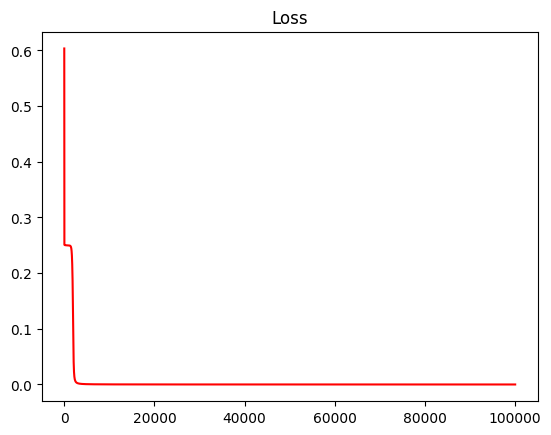

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(nn2.history.keys()), list(nn2.history.values()), '-', color='red')
plt.title('Loss')
plt.show()

In [13]:
np.round(nn2.predict(dataset.X))

array([[1.],
       [0.],
       [0.],
       [1.]])

In [14]:
nn2.cost(dataset.X,dataset.y)

1.2637211871393229e-05